**Airport Sidewall Panels**

The model will aim to predict the cost of producing airport sidewall Panels based on lot size

# 1. Imports and Dependencies

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Loading and Preprocessing
## 2.1 Data Loading

In [54]:
airplanepanels = pd.read_csv('Airplane Sidewall Panels.csv')

## 2.2 Exploratory Data Analysis

In [55]:
airplanepanels.head()

,Production Lot Size,Cost (US 100$)
0,20,1.8100
1,25,1.7000
2,30,1.6500
3,35,1.5500
4,40,1.4800


## 2.3 Data Preprocessing

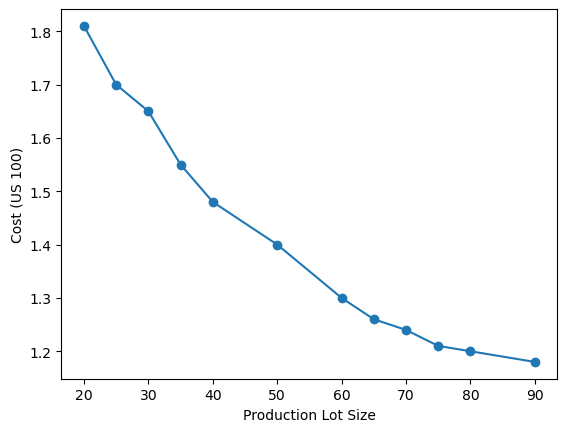

In [56]:
plt.plot(airplanepanels['Production Lot Size'], airplanepanels['Cost (US 100$)'], marker = 'o')
plt.xlabel('Production Lot Size')
plt.ylabel('Cost (US 100)')
plt.show()

## 2.4 Splitting Dataset

In [57]:
# Split into input and output
x = airplanepanels.iloc[:, 0].reset_index(drop=True)  # First column without original index
y = airplanepanels.iloc[:, 1:].reset_index(drop=True)  # Remaining columns without original index
print(x)

0     20
1     25
2     30
3     35
4     40
5     50
6     60
7     65
8     70
9     75
10    80
11    90
Name: Production Lot Size, dtype: int64


In [58]:
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

# Assuming x_train is a pandas Series or 1D array
x_train = x_train.values.reshape(-1, 1)  # Convert to 2D array
x_test = x_test.values.reshape(-1, 1)  # Ensure x_test is also 2D

In [59]:
print(x_train)

[[70]
 [50]
 [30]
 [25]
 [90]
 [40]
 [65]
 [35]
 [60]]


# 3. Model Development

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.preprocessing import PolynomialFeatures # For feature scaling & polynomial regression

# Apply polynomial Regression

results = []

for degree in range(1, 9):
    #create and fit the polynomial regression model
    poly_reg = PolynomialFeatures(degree)
    X_poly = poly_reg.fit_transform(x_train)
    X_poly_test = poly_reg.transform(x_test)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_train)

    # Make Predictions
    y_poly_pred_train = poly_model.predict(X_poly)
    y_poly_pred_test = poly_model.predict(X_poly_test)

    # Calculate metrics (r2_score)
    r2_train = r2_score(y_train, y_poly_pred_train)
    r2_test = r2_score(y_test, y_poly_pred_test)

    results.append({
        'Degree': degree,
        'R2 (Train)': r2_train, 
        'R2 (Test)': r2_test
    })

    #Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Find the best model based on test R2 score
    best_model = results_df.loc[results_df['R2 (Test)'].idxmax()]

# Set the display option for pandas to show floats with 3 decimal places
pd.options.display.float_format = '{:.4f}'.format

print("Best Index: ")
print(best_model)
print(results_df)

Best Index: 
Degree       4.0000
R2 (Train)   0.9964
R2 (Test)    0.9990
Name: 3, dtype: float64
   Degree  R2 (Train)  R2 (Test)
0       1      0.9281     0.9346
1       2      0.9963     0.9976
2       3      0.9964     0.9984
3       4      0.9964     0.9990
4       5      0.9967     0.9865
5       6      0.9999     0.5740
6       7      0.9995     0.5799
7       8      0.9990     0.3247


# 4. Model Evaluation
## 4.1 Performance Metrics

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

## 4.2 Results Visualization

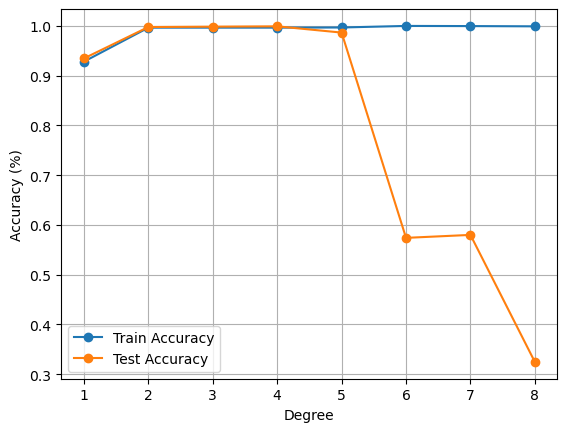

In [69]:
plt.plot(results_df['Degree'], results_df['R2 (Train)'], marker = 'o', label = 'Train Accuracy')
plt.plot(results_df['Degree'], results_df['R2 (Test)'], marker = 'o', label = 'Test Accuracy')
plt.xlabel('Degree')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.legend()
plt.show()

# 5. Conclusion